# (History of Baywheel)
## by (Mohamed Medhat)

## Investigation Overview

> 1- The trends and growth of trips and hours generated through history.

> 2- Does baywheel has a high-demand station we can monitor or focus on.

> 3- who is performing well the customer or the subscriber.

## Dataset Overview

> The dataset is a combination of 14 files combined horizontally from 2018-01 to 2019-04.

> Contains the rides details and their start and end locations. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
from IPython.display import Markdown, display
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
try:
    main_path = os.getcwd()+'\\files'
    os.mkdir(os.getcwd()+'/files')
except FileExistsError:
    os.close
    
path_run = os.getcwd()
os.chdir(main_path)
baywheels = pd.read_csv('baywheels.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Trips and Hours Seasonality Trends)

> There is a great trending between trips and hours across the month of each year.

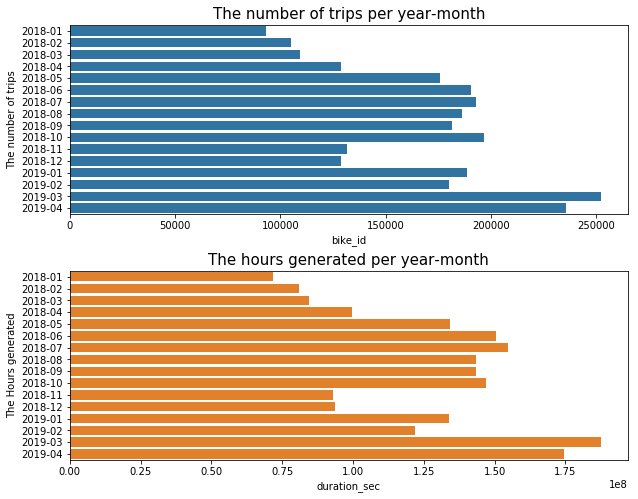

In [3]:
da = pd.pivot_table(
    baywheels[['year_month', 'duration_sec', 'bike_id']], 
    index=['year_month'], 
    values=['duration_sec', 'bike_id'],
    aggfunc= {'duration_sec': np.sum, 'bike_id': len}).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sns.barplot(data = da, x='bike_id', y = 'year_month', color=sns.color_palette()[0], ax=ax[0], orient="h")
ax[0].set_title("The number of trips per year-month", fontsize=15)
ax[0].set_ylabel("The number of trips", fontsize=10)
#ax[0].set_xticklabels(da['year_month'], rotation=90)

sns.barplot(data = da, x='duration_sec', y = 'year_month', color=sns.color_palette()[1], ax=ax[1], orient="h")
ax[1].set_title("The hours generated per year-month", fontsize=15)
ax[1].set_ylabel("The Hours generated", fontsize=10)
#ax[1].set_xticklabels(da['year_month'], rotation=90)

plt.subplots_adjust(hspace=.3);

- Showing that the trips and hours have the same trend across year/months.
- Trips and hours are increasing in the summer and go down in winter, which is close to the normal as riding the bikes it might seem hard during winter weather against the summer.
- Also, there is a huge increase in the next year months vs the last one, given us a growth perspective and predict that after 2019-05 will witness an increase in trips and hours.

## (How the Trips per Hour metric is performaed amoung the user-types: )


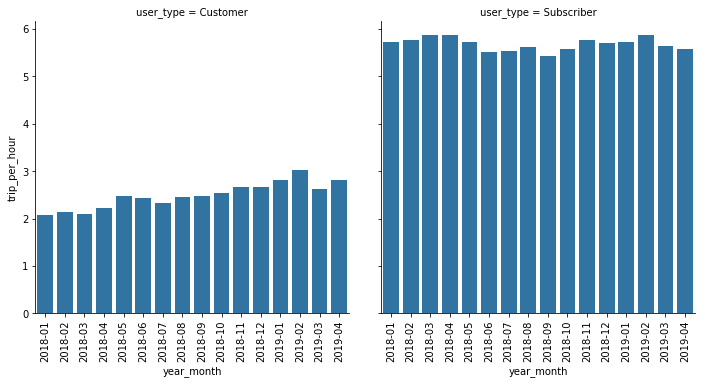

In [ ]:
da2 = pd.pivot_table(
    baywheels[['year_month', 'duration_sec', 'bike_id', 'user_type']], 
    index=['year_month', 'user_type'], 
    values=['duration_sec', 'bike_id'],
    aggfunc= {'duration_sec': np.sum, 'bike_id': len}).reset_index()

da2['trip_per_hour'] = da2['bike_id'] / (da2['duration_sec']/3600)


g = sns.FacetGrid(da2, col='user_type', margin_titles=True, size=5)
(g.map(sns.barplot, 'year_month', 'trip_per_hour')).set_xticklabels(rotation=90);


- Showing that the subscriber tends to do more trips and hours more than the customer.
- The customer has a limit of trips below the 300 against the subscriber which is more than 1000.
- Both have a positive relation to each other but the subscriber tends to be more linear more than the customer.
- Given the subscriber the huge contribution of trips and hours allows us to sustain more supply to these subscribers as any damage or unfulfillment of their rides will result of losing trips and hours as well.

## (The start and end toppers stations:)



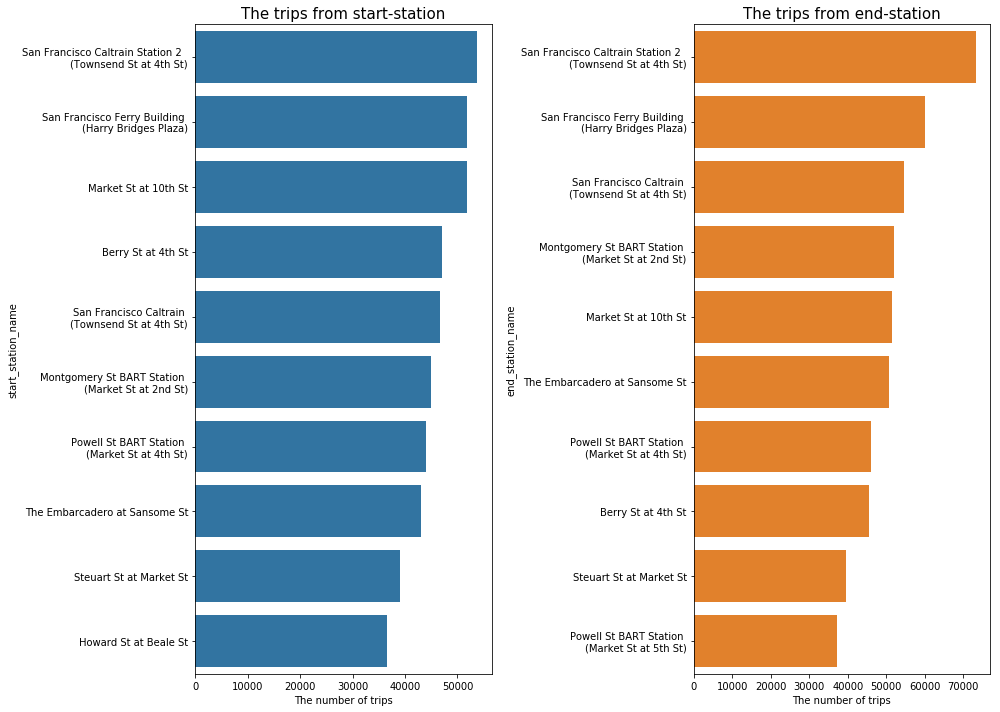

In [ ]:
da3 = pd.pivot_table(
    baywheels[['start_station_name', 'duration_sec', 'bike_id']], 
    index=['start_station_name'], 
    values=['duration_sec', 'bike_id'],
    aggfunc= {'duration_sec': np.sum, 'bike_id': len}).sort_values('bike_id', ascending=False).head(10).reset_index()

da4 = pd.pivot_table(
    baywheels[['end_station_name', 'duration_sec', 'bike_id']], 
    index=['end_station_name'], 
    values=['duration_sec', 'bike_id'],
    aggfunc= {'duration_sec': np.sum, 'bike_id': len}).sort_values('bike_id', ascending=False).head(10).reset_index()

labels = [item.get_text().replace('(','\n(') for item in ax[0].get_yticklabels()]

fig, ax = plt.subplots(1, 2, figsize=(14, 10))

sns.barplot(data = da3, x='bike_id', y = da3['start_station_name'].astype('object'), color=sns.color_palette()[0], ax=ax[0])
ax[0].set_title("The trips from start-station", fontsize=15)
ax[0].set_xlabel("The number of trips", fontsize=10)
labels = [item.get_text().replace('(','\n(') for item in ax[0].get_yticklabels()]
ax[0].set_yticklabels(labels)

sns.barplot(data = da4, x='bike_id', y = da4['end_station_name'].astype('object'), color=sns.color_palette()[1], ax=ax[1])
ax[1].set_title("The trips from end-station", fontsize=15)
ax[1].set_xlabel("The number of trips", fontsize=10)
labels = [item.get_text().replace('(','\n(') for item in ax[1].get_yticklabels()]
ax[1].set_yticklabels(labels)

plt.tight_layout();

- The most of the start stations are the end ones which generate a huge demand on these stations and require a huge supply to sustain and maintain these trips requests.

- The top stations are the hubs that can be called the generators, they generate the majority of trips so a focus will be needed to these stations.

In [ ]:
os.chdir(path_run)
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle